In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [49]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from datetime import datetime
import sweetviz as sv
from sklearn.linear_model import LinearRegression

# chargement du data set

In [51]:
df = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv", sep='\t')
display(df)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [52]:
df.shape

(2240, 29)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [54]:
my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## traitement des valeurs manquantes au sein de income
on va remplacer ces valeur par la mediane

In [55]:
df['Income']=df['Income'].fillna(df['Income'].mean())

# maria en ouvrant ce rapport (le fichier html tu trouveras que l'age maximal est de 128 ans ... on supprime ou on demande une clarification au charge de td (ce message est a supprimer)

# Analyse en composantes principales

In [56]:
columns = ['MntWines', 'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

In [57]:
XVariableDepenses = df[columns]

In [58]:
scaler = StandardScaler()
XVariableDepensesCentreReduite = scaler.fit_transform(XVariableDepenses)


In [59]:
# On paramètre notre PCA pour garder les deux premières composantes
pca=PCA(2)
pca_result = pca.fit_transform(XVariableDepensesCentreReduite)
pca_result.shape


(2240, 2)

In [60]:
pca.explained_variance_ratio_.sum()

0.6842408799439845

In [61]:
components_variance = pca.explained_variance_ratio_
print(sum(components_variance))
print(components_variance)

0.6842408799439845
[0.56134956 0.12289132]


In [62]:
loadings = pca.components_

In [63]:
df_loadings = pd.DataFrame(loadings, columns=columns, index=['F1', 'F2'])

In [64]:
df_loadings

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
F1,0.372927,0.429155,0.436106,0.439396,0.420966,0.341001
F2,0.616026,-0.340451,0.044534,-0.285072,-0.375910,0.529195


In [65]:
pcadata = pd.DataFrame(pca_result, columns=['F1', 'F2'])

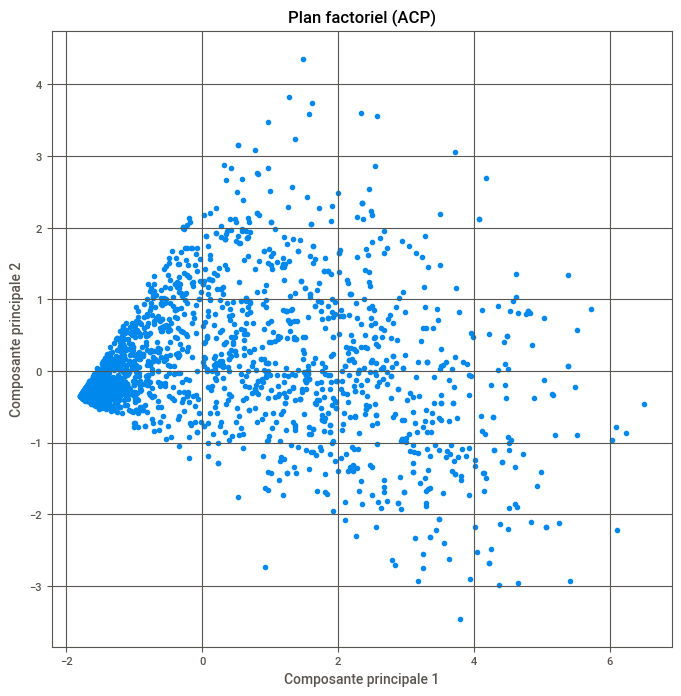

In [69]:
plt.figure(figsize=(8,8))
plt.scatter(pcadata["F1"], pcadata["F2"])
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Plan factoriel (ACP)")
plt.grid()
plt.show()

# Corrélation et dépendance

## Calculez la matrice de corrélation entre le revenu, l’âge et les dépenses totales.
*  Quelle variable est la plus liée aux dépenses?
*  La corrélation entre âge et dépenses est-elle intuitive? Comment l’expliquer?

In [72]:
df_corr = df[['Income']].copy()
df_corr['Age'] = datetime.now().year - df['Year_Birth']
df_corr['Spendings'] = XVariableDepenses.sum(axis=1)


In [73]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     2240 non-null   float64
 1   Age        2240 non-null   int64  
 2   Spendings  2240 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 52.6 KB


In [76]:
matrix = df_corr.corr()

In [77]:
matrix

,Income,Age,Spendings
Income,1.000000,0.160942,0.664706
Age,0.160942,1.000000,0.111306
Spendings,0.664706,0.111306,1.000000


## Représentez les relations par des nuages de points.
* Les tendances observées confirment-elles les intuitions du service marketing?
* Quelle stratégie de communication pourrait-on adapter à partir de ces obser-
vations?

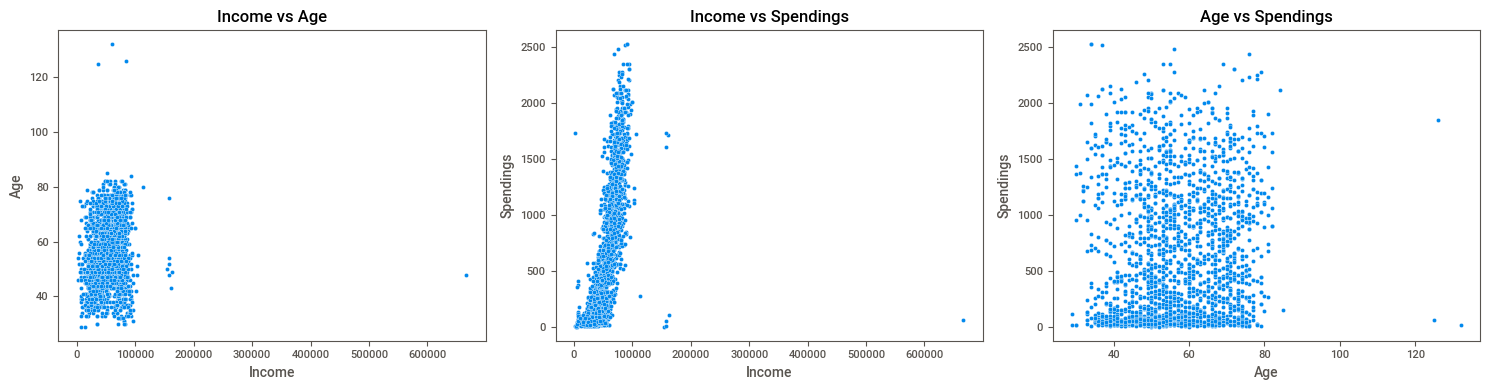

In [78]:
import seaborn as sns
from itertools import combinations

# List all column pairs for scatter plots
col_pairs = list(combinations(df_corr.columns, 2))
fig, axes = plt.subplots(1, len(col_pairs), figsize=(5*len(col_pairs), 4))

if len(col_pairs) == 1:
    axes = [axes]
for ax, (col_x, col_y) in zip(axes, col_pairs):
    sns.scatterplot(data=df_corr, x=col_x, y=col_y, ax=ax)
    ax.set_title(f"{col_x} vs {col_y}")

plt.tight_layout()
plt.show()


# Régression linéaire multiple

## Construisez un modèle pour estimer les dépenses totales en fonction du revenu, de l’âge et du nombre d’enfants.
* Quelle est la pente associée au revenu? Que traduit-elle économiquement?
* Quelle variable a l’effet le plus fort sur le niveau de dépense?


### on pose la target Y "revenu totaux"

In [80]:
y=np.array(df_corr['Spendings'])

### on effectue la regression pour chacune des variable separement

In [81]:
X_income=np.array(df_corr['Income'])
X_age=np.array(df_corr['Age'])
X_kids=np.array(df['Kidhome'])+np.array(df['Teenhome'])

In [86]:
reg_income = LinearRegression().fit(X_income.reshape(-1, 1), y)
reg_age = LinearRegression().fit(X_age.reshape(-1, 1), y)
reg_kids = LinearRegression().fit(X_kids.reshape(-1, 1), y)

In [89]:
reg_income.score(X_income.reshape(-1, 1),y)

0.4418347278550545

In [ ]:
reg_age.score()

In [ ]:
reg_kids.score()

### regression multiple

In [108]:
dfTrain = df[['Kidhome']].copy()
dfTrain['Kidhome'].add(df['Teenhome'], fill_value=0)
dfTrain['Income']=df_corr['Income']
dfTrain['Age']=df_corr['Age']
dfTrain[]

In [146]:
XCentreReduite = scaler.fit_transform(dfTrain)


In [154]:
ones = np.ones((XCentreReduite.shape[0], 1))
XCentreReduiteavec1 = np.column_stack((XCentreReduite, ones))

In [155]:
reg = LinearRegression().fit(XCentreReduiteavec1, y)


In [156]:
reg.score(XCentreReduiteavec1, y)

0.5361423646801419

In [157]:
reg.coef_

array([-3.85867838e+02,  1.26652451e-02, -2.65528747e+00,  0.00000000e+00])

## Étudiez le coefficient de détermination R2
* Le modèle explique-t-il une part importante de la variabilité des comporte-
ments?
* Si non, quelles variables qualitatives (fidélité, type de foyer, etc.) pourraient
améliorer le modèle?


In [159]:
Y_hat=reg.predict(XCentreReduiteavec1)

In [160]:
from sklearn.metrics import r2_score
r2_score(y, Y_hat)


0.5361423646801419

## Représentez graphiquement les valeurs réelles et prédites.
* Le modèle surestime-t-il ou sous-estime-t-il certains profils?
* Que cela pourrait-il indiquer pour la stratégie de ciblage client?

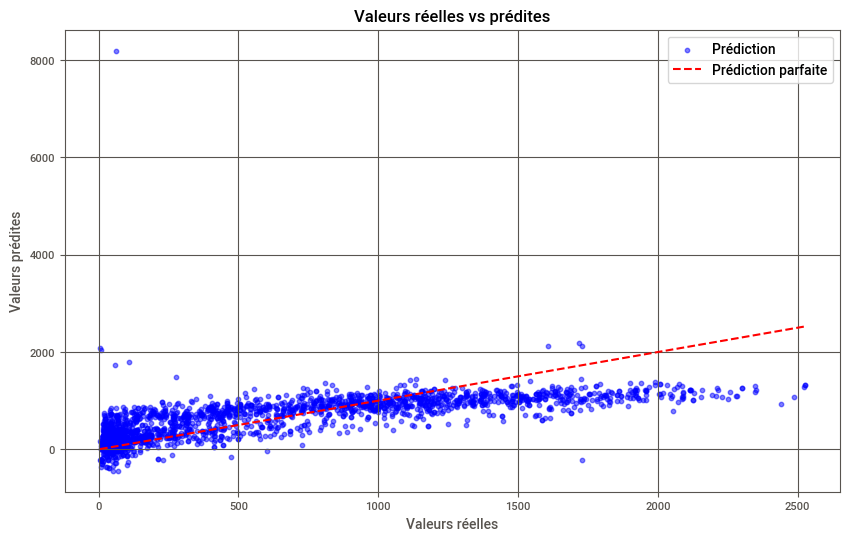

In [164]:
plt.figure(figsize=(10, 6))  # Agrandit le graphique
plt.scatter(y, Y_hat, s=10, alpha=0.5, color='blue', label='Prédiction')  # Points plus petits et transparents
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Prédiction parfaite')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Valeurs réelles vs prédites')
plt.legend()
plt.grid(True)
plt.show()

# Analyse descriptive

## Calculez les moyennes et écarts-types du revenu, des dépenses totales et de l’âge.
* Que révèlent ces statistiques sur la composition de la clientèle?
* Le portefeuille client semble-t-il équilibré entre foyers modestes et aisés?

In [ ]:
df_corr.describe()


## Représentez les distributions par des histogrammes.
* En observant les graphiques, voyez-vous des écarts notables entre les catégories
de clients?
* Quels types de produits semblent concentrer la majorité des dépenses?

In [ ]:
plt.hist(df_corr['Income'],15)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.grid(True)

In [ ]:
plt.hist(df_corr['Age'],15)
plt.xlabel('Ag')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(True)

In [ ]:
plt.hist(df_corr['Spendings'],10)
plt.xlabel('amount spent in $')
plt.ylabel('Frequency')
plt.title('Distribution of Spendings')
plt.grid(True)